<a href="https://colab.research.google.com/github/Hamza-Atiq/Innoquest-choret1-AI-ML-Training-/blob/main/Lecture5_innovista_training_program_data_preprocessing_and_analysis_and_1case_study_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/housing.csv')

In [3]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
missing_values = data.isnull().sum()
missing_values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
missing_values_percentage = (missing_values / len(data)) * 100
missing_values_percentage

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [9]:
data_cleaned = data.dropna()
data_cleaned.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

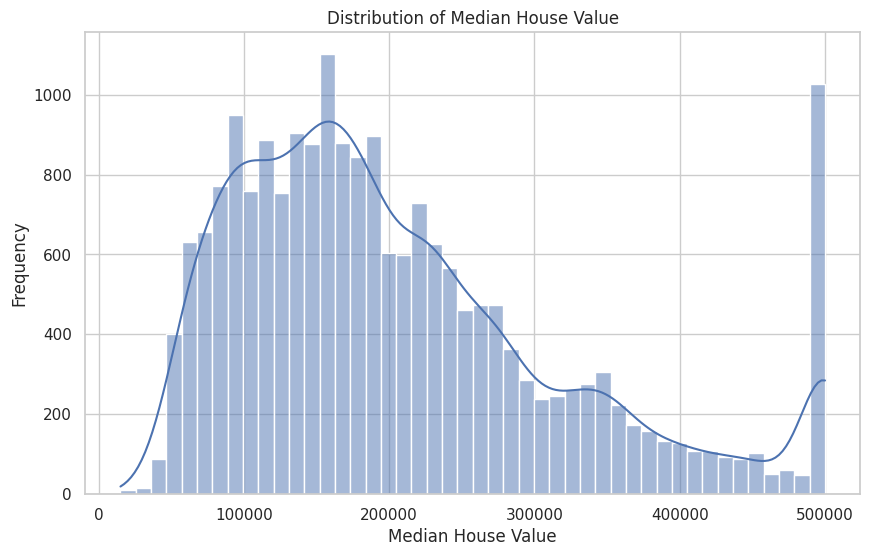

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['median_house_value'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

In [13]:
Q1 = data['median_house_value'].quantile(0.25)
Q3 = data['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data_cleaned[(data_cleaned['median_house_value'] < lower_bound) | (data_cleaned['median_house_value'] > upper_bound)]
outliers


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
89       -122.27     37.80                52.0        249.0            78.0   
140      -122.18     37.81                30.0        292.0            38.0   
459      -122.25     37.87                52.0        609.0           236.0   
489      -122.25     37.86                48.0       2153.0           517.0   
493      -122.24     37.86                52.0       1668.0           225.0   
...          ...       ...                 ...          ...             ...   
20422    -118.90     34.14                35.0       1503.0           263.0   
20426    -118.69     34.18                11.0       1177.0           138.0   
20427    -118.80     34.19                 4.0      15572.0          2222.0   
20436    -118.69     34.21                10.0       3663.0           409.0   
20443    -118.85     34.27                50.0        187.0            33.0   

       population  households  median_income  median_house_value  \
89          396.0        85.0         1.2434            500001.0   
140         126.0        52.0         6.3624            483300.0   
459        1349.0       250.0         1.1696            500001.0   
489        1656.0       459.0         3.0417            489600.0   
493         517.0       214.0         7.8521            500001.0   
...           ...         ...            ...                 ...   
20422       576.0       216.0         5.1457            500001.0   
20426       415.0       119.0        10.0472            500001.0   
20427      5495.0      2152.0         8.6499            500001.0   
20436      1179.0       371.0        12.5420            500001.0   
20443       130.0        35.0         3.3438            500001.0   

      ocean_proximity  
89           NEAR BAY  
140          NEAR BAY  
459          NEAR BAY  
489          NEAR BAY  
493          NEAR BAY  
...               ...  
20422       <1H OCEAN  
20426       <1H OCEAN  
20427       <1H OCEAN  
20436       <1H OCEAN  
20443       <1H OCEAN  

[1064 rows x 10 columns]

In [14]:
data_without_outliers = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value'] <= upper_bound)]
data_without_outliers

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[19369 rows x 10 columns]

In [15]:
data_without_outliers.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  19369.000000  19369.000000        19369.000000  19369.000000   
mean    -119.563902     35.655784           28.344158   2620.710930   
std        2.005895      2.151468           12.503931   2187.046669   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.760000     33.930000           18.000000   1440.000000   
50%     -118.510000     34.270000           28.000000   2110.000000   
75%     -117.990000     37.730000           37.000000   3119.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    19369.000000  19369.000000  19369.000000   19369.000000   
mean       539.893335   1442.285043    501.303991       3.665475   
std        422.650225   1145.780125    383.339200       1.556776   
min          2.000000      3.000000      2.000000       0.499900   
25%        297.000000    798.000000    282.000000       2.522300   
50%        437.000000   1181.000000    411.000000       3.442700   
75%        648.000000   1746.000000    606.000000       4.572400   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        19369.000000  
mean        190802.064949  
std          95404.934086  
min          14999.000000  
25%         116100.000000  
50%         173200.000000  
75%         246400.000000  
max         482200.000000

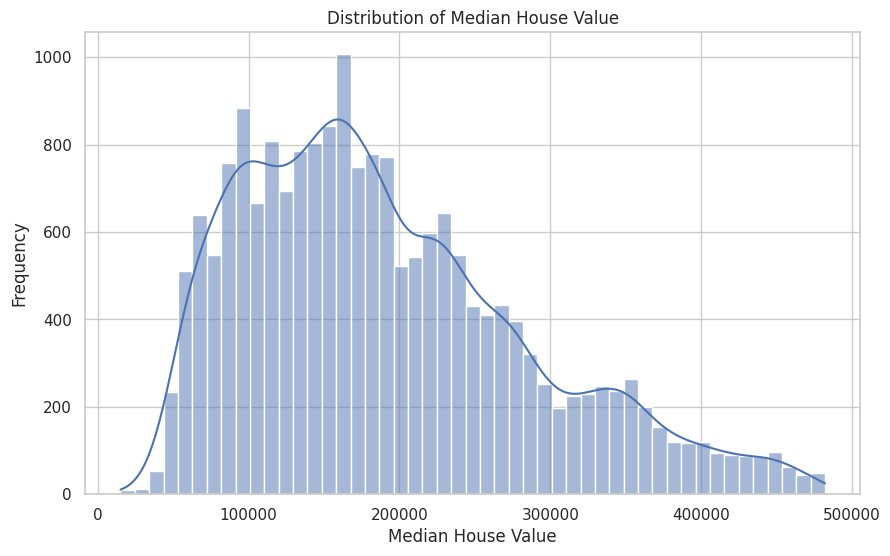

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_without_outliers['median_house_value'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

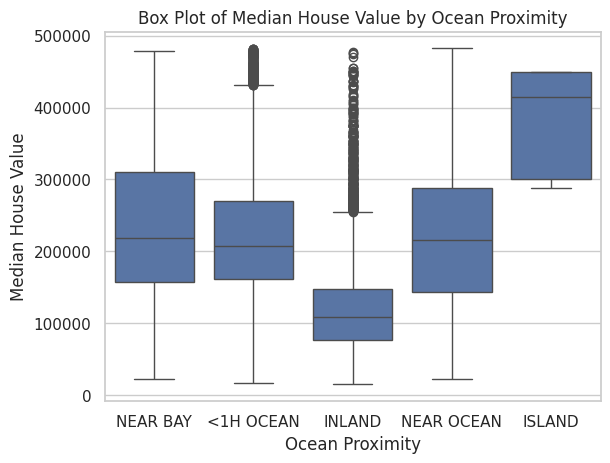

In [17]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data_without_outliers)
plt.title('Box Plot of Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

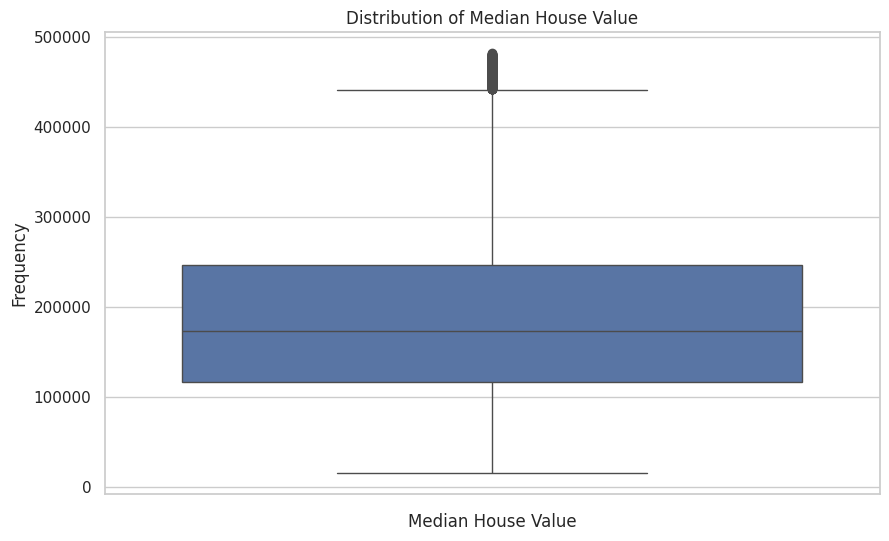

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data_without_outliers['median_house_value'])
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

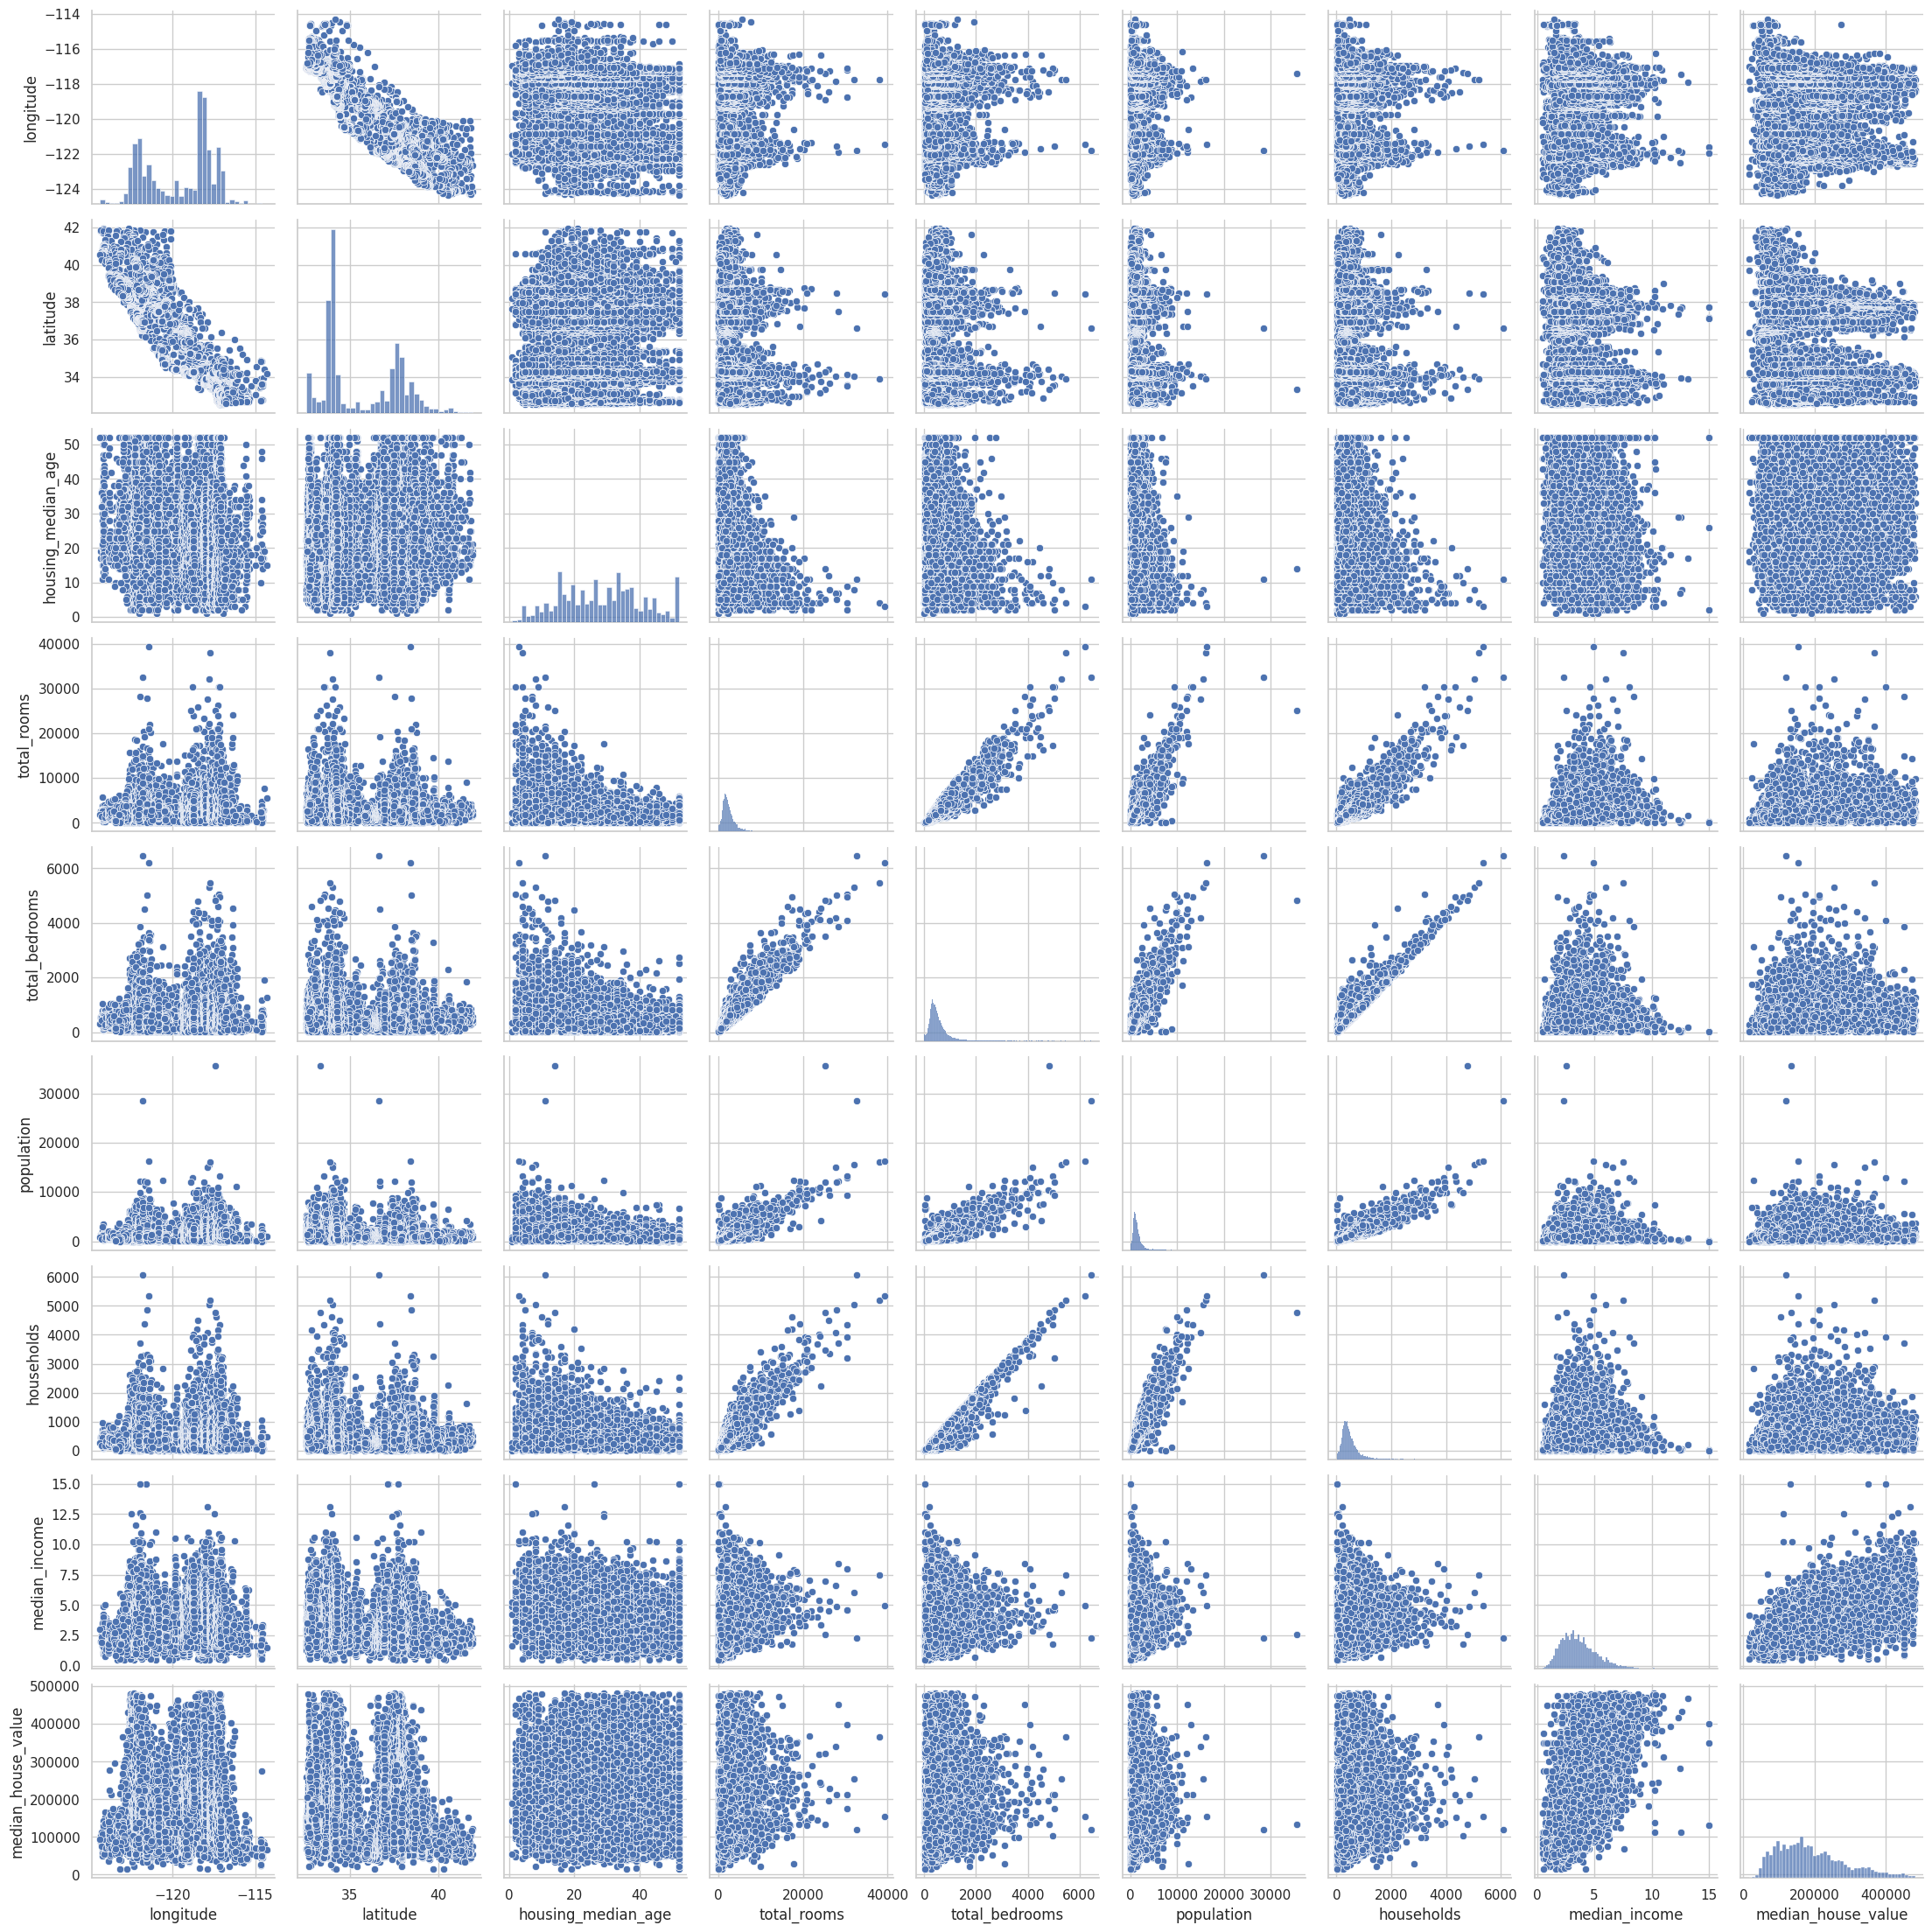

In [19]:
sns.pairplot(data_without_outliers)
plt.show()

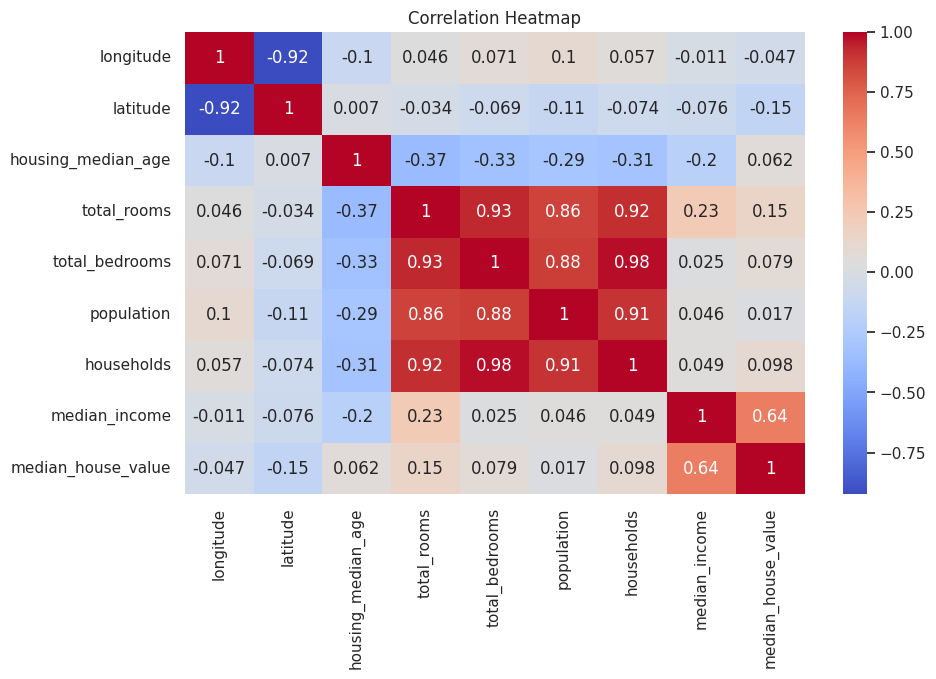

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_without_outliers.corr(numeric_only = True ), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
pd.get_dummies(data_without_outliers, columns=['ocean_proximity'])

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                          False                   False   
1                          False                   False   
2                          False                   False   
3                          False                   False   
4                          False                   False   
...                          ...                     ...   
20635                      False                    True   
20636                      False                    True   
20637                      False                    True   
20638                      False                    True   
20639                      False                    True   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       False                      True   
1                       False                      True   
2                       False                      True   
3                       False                      True   
4                       False                      True   
...                       ...                       ...   
20635                   False                     False   
20636                   False                     False   
20637                   False                     False   
20638                   False                     False   
20639                   False                     False   

       ocean_proximity_NEAR OCEAN  
0                           False  
1                           False  
2                           False  
3                           False  
4                           False  
...                           ...  
20635                       False  
20636                       False  
20637                       False  
20638                       False  
20639                       False  

[19369 rows x 14 columns]

# **Case Study**

In [22]:
raw_csv_data = pd.read_csv('/content/Absenteeism_data.csv')
raw_csv_data

ID  Reason for Absence        Date  Transportation Expense  \
0    11                  26  07/07/2015                     289   
1    36                   0  14/07/2015                     118   
2     3                  23  15/07/2015                     179   
3     7                   7  16/07/2015                     279   
4    11                  23  23/07/2015                     289   
..   ..                 ...         ...                     ...   
695  17                  10  23/05/2018                     179   
696  28                   6  23/05/2018                     225   
697  18                  10  24/05/2018                     330   
698  25                  23  24/05/2018                     235   
699  15                  28  31/05/2018                     291   

     Distance to Work  Age  Daily Work Load Average  Body Mass Index  \
0                  36   33                  239.554               30   
1                  13   50                  239.554               31   
2                  51   38                  239.554               31   
3                   5   39                  239.554               24   
4                  36   33                  239.554               30   
..                ...  ...                      ...              ...   
695                22   40                  237.656               22   
696                26   28                  237.656               24   
697                16   28                  237.656               25   
698                16   32                  237.656               25   
699                31   40                  237.656               25   

     Education  Children  Pets  Absenteeism Time in Hours  
0            1         2     1                          4  
1            1         1     0                          0  
2            1         0     0                          2  
3            1         2     0                          4  
4            1         2     1                          2  
..         ...       ...   ...                        ...  
695          2         2     0                          8  
696          1         1     2                          3  
697          2         0     0                          8  
698          3         0     0                          2  
699          1         1     1                          2  

[700 rows x 12 columns]

# Preprocessing

In [23]:
df = raw_csv_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [24]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [25]:
df

ID  Reason for Absence        Date  Transportation Expense  \
0    11                  26  07/07/2015                     289   
1    36                   0  14/07/2015                     118   
2     3                  23  15/07/2015                     179   
3     7                   7  16/07/2015                     279   
4    11                  23  23/07/2015                     289   
5     3                  23  10/07/2015                     179   
6    10                  22  17/07/2015                     361   
7    20                  23  24/07/2015                     260   
8    14                  19  06/07/2015                     155   
9     1                  22  13/07/2015                     235   
10   20                   1  20/07/2015                     260   
11   20                   1  14/07/2015                     260   
12   20                  11  15/07/2015                     260   
13    3                  11  15/07/2015                     179   
14    3                  23  15/07/2015                     179   
15   24                  14  17/07/2015                     246   
16    3                  23  17/07/2015                     179   
17    3                  21  27/07/2015                     179   
18    6                  11  30/07/2015                     189   
19   33                  23  05/08/2015                     248   
20   18                  10  12/08/2015                     330   
21    3                  11  03/08/2015                     179   
22   10                  13  10/08/2015                     361   
23   20                  28  14/08/2015                     260   
24   11                  18  17/08/2015                     289   
25   10                  25  24/08/2015                     361   
26   11                  23  04/08/2015                     289   
27   30                  28  12/08/2015                     157   
28   11                  18  19/08/2015                     289   
29    3                  23  28/08/2015                     179   
30    3                  18  17/08/2015                     179   
31    2                  18  27/08/2015                     235   
32    1                  23  27/08/2015                     235   
33    2                  18  17/08/2015                     235   
34    3                  23  17/08/2015                     179   
35   10                  23  17/08/2015                     361   
36   11                  24  04/08/2015                     289   
37   19                  11  20/08/2015                     291   
38    2                  28  21/08/2015                     235   
39   20                  23  28/08/2015                     260   
40   27                  23  01/09/2015                     184   
41   34                  23  07/09/2015                     118   
42    3                  23  01/09/2015                     179   
43    5                  19  08/09/2015                     235   
44   14                  23  09/09/2015                     155   
45   34                  23  13/09/2015                     118   
46    3                  23  14/09/2015                     179   
47   15                  23  24/09/2015                     291   
48   20                  22  04/09/2015                     260   
49   15                  14  14/09/2015                     291   
50   20                   0  21/09/2015                     260   
51   29                   0  28/09/2015                     225   
52   28                  23  08/09/2015                     225   
53   34                  23  15/09/2015                     118   
54   11                   0  22/09/2015                     289   
55   36                   0  29/09/2015                     118   
56   28                  18  16/09/2015                     225   
57    3                  23  23/09/2015                     179   
58   13                   0  30/09/2015             

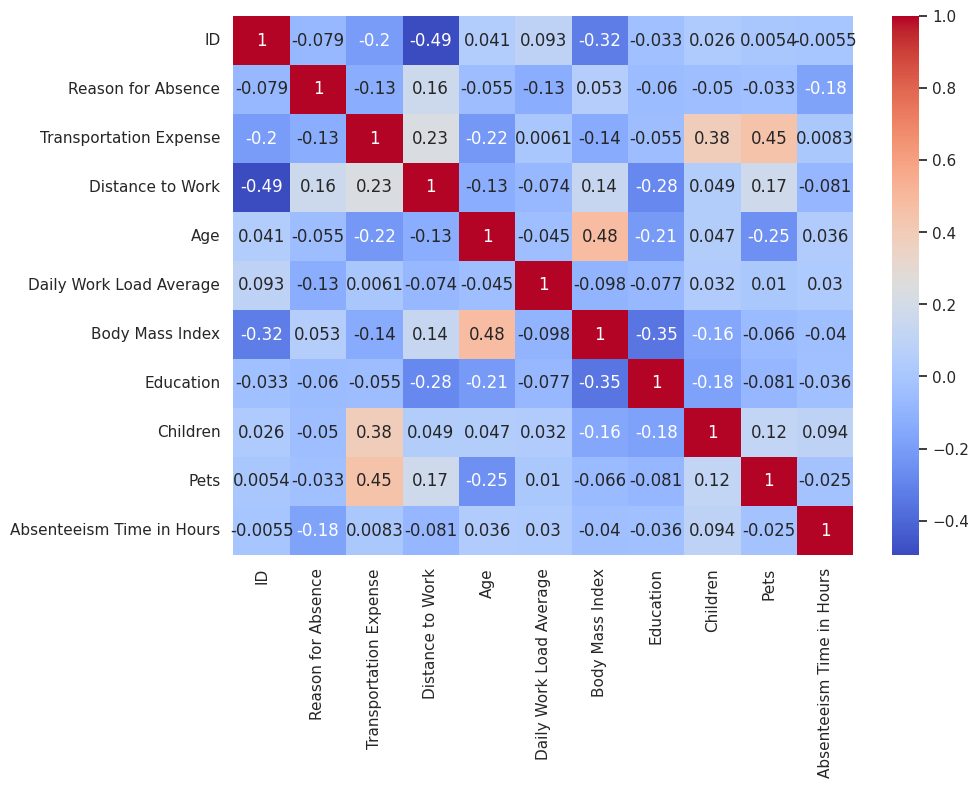

In [26]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only = True) , annot=True, cmap='coolwarm')
plt.show()

In [27]:
df.drop(['ID'], axis=1, inplace=True)

In [28]:
df.head()

Reason for Absence        Date  Transportation Expense  Distance to Work  \
0                  26  07/07/2015                     289                36   
1                   0  14/07/2015                     118                13   
2                  23  15/07/2015                     179                51   
3                   7  16/07/2015                     279                 5   
4                  23  23/07/2015                     289                36   

   Age  Daily Work Load Average  Body Mass Index  Education  Children  Pets  \
0   33                  239.554               30          1         2     1   
1   50                  239.554               31          1         1     0   
2   38                  239.554               31          1         0     0   
3   39                  239.554               24          1         2     0   
4   33                  239.554               30          1         2     1   

   Absenteeism Time in Hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2

In [29]:
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [30]:
df['Reason for Absence'].min()

0

In [31]:
df['Reason for Absence'].max()

28

In [32]:
len(df['Reason for Absence'].unique())

28

In [33]:
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [34]:
df = pd.get_dummies(df, columns=['Reason for Absence'])
df.head()

Date  Transportation Expense  Distance to Work  Age  \
0  07/07/2015                     289                36   33   
1  14/07/2015                     118                13   50   
2  15/07/2015                     179                51   38   
3  16/07/2015                     279                 5   39   
4  23/07/2015                     289                36   33   

   Daily Work Load Average  Body Mass Index  Education  Children  Pets  \
0                  239.554               30          1         2     1   
1                  239.554               31          1         1     0   
2                  239.554               31          1         0     0   
3                  239.554               24          1         2     0   
4                  239.554               30          1         2     1   

   Absenteeism Time in Hours  Reason for Absence_0  Reason for Absence_1  \
0                          4                 False                 False   
1                          0                  True                 False   
2                          2                 False                 False   
3                          4                 False                 False   
4                          2                 False                 False   

   Reason for Absence_2  Reason for Absence_3  Reason for Absence_4  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                 False                 False   

   Reason for Absence_5  Reason for Absence_6  Reason for Absence_7  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                  True   
4                 False                 False                 False   

   Reason for Absence_8  Reason for Absence_9  Reason for Absence_10  \
0                 False                 False                  False   
1                 False                 False                  False   
2                 False                 False                  False   
3                 False                 False                  False   
4                 False                 False                  False   

   Reason for Absence_11  Reason for Absence_12  Reason for Absence_13  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   Reason for Absence_14  Reason for Absence_15  Reason for Absence_16  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   Reason for Absence_17  Reason for Absence_18  Reason for Absence_19  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   Reason for Absence_21  Reason for Absence_22  Reason for Absence_23  \
0                  False  

In [35]:
df.shape

(700, 38)

In [36]:
df.sum()

Date                         07/07/201514/07/201515/07/201516/07/201523/07/...
Transportation Expense                                                  155643
Distance to Work                                                         20925
Age                                                                      25492
Daily Work Load Average                                             190261.242
Body Mass Index                                                          18716
Education                                                                  898
Children                                                                   715
Pets                                                                       481
Absenteeism Time in Hours                                                 4733
Reason for Absence_0                                                        38
Reason for Absence_1                                                        16
Reason for Absence_2                                                         1
Reason for Absence_3                                                         1
Reason for Absence_4                                                         2
Reason for Absence_5                                                         3
Reason for Absence_6                                                         6
Reason for Absence_7                                                        13
Reason for Absence_8                                                         5
Reason for Absence_9                                                         4
Reason for Absence_10                                                       22
Reason for Absence_11                                                       24
Reason for Absence_12                                                        8
Reason for Absence_13                                                       52
Reason for Absence_14                                                       18
Reason for Absence_15                                                        2
Reason for Absence_16                                                        3
Reason for Absence_17                                                        1
Reason for Absence_18                                                       21
Reason for Absence_19                                                       36
Reason for Absence_21                                                        6
Reason for Absence_22                                                       32
Reason for Absence_23                                                      147
Reason for Absence_24                                                        3
Reason for Absence_25                                                       29
Reason for Absence_26                                                       31
Reason for Absence_27                                                       66
Reason for Absence_28                                                      110
dtype: object

# Reason 1 to 14   class 1
# Reason 15 to 17  class 2
# Reason 18 to 21  class 3
# Reason 22 to 28  class 4

In [37]:
df.drop(['Reason for Absence_0'], axis=1, inplace=True)

In [38]:
df.head()

Date  Transportation Expense  Distance to Work  Age  \
0  07/07/2015                     289                36   33   
1  14/07/2015                     118                13   50   
2  15/07/2015                     179                51   38   
3  16/07/2015                     279                 5   39   
4  23/07/2015                     289                36   33   

   Daily Work Load Average  Body Mass Index  Education  Children  Pets  \
0                  239.554               30          1         2     1   
1                  239.554               31          1         1     0   
2                  239.554               31          1         0     0   
3                  239.554               24          1         2     0   
4                  239.554               30          1         2     1   

   Absenteeism Time in Hours  Reason for Absence_1  Reason for Absence_2  \
0                          4                 False                 False   
1                          0                 False                 False   
2                          2                 False                 False   
3                          4                 False                 False   
4                          2                 False                 False   

   Reason for Absence_3  Reason for Absence_4  Reason for Absence_5  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                 False                 False   

   Reason for Absence_6  Reason for Absence_7  Reason for Absence_8  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                  True                 False   
4                 False                 False                 False   

   Reason for Absence_9  Reason for Absence_10  Reason for Absence_11  \
0                 False                  False                  False   
1                 False                  False                  False   
2                 False                  False                  False   
3                 False                  False                  False   
4                 False                  False                  False   

   Reason for Absence_12  Reason for Absence_13  Reason for Absence_14  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   Reason for Absence_15  Reason for Absence_16  Reason for Absence_17  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   Reason for Absence_18  Reason for Absence_19  Reason for Absence_21  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   Reason for Absence_22  Reason for Absence_23  Reason for Absence_24  \
0                  F

In [39]:
df['reason_type_1'] = df.loc[: , 'Reason for Absence_1' : 'Reason for Absence_14'].max(axis=1)
df['reason_type_2'] = df.loc[: , 'Reason for Absence_15' : 'Reason for Absence_17'].max(axis=1)
df['reason_type_3'] = df.loc[: , 'Reason for Absence_18' : 'Reason for Absence_21'].max(axis=1)
df['reason_type_4'] = df.loc[: , 'Reason for Absence_22' : 'Reason for Absence_28'].max(axis=1)
df.drop(columns=df.loc[: , 'Reason for Absence_1' : 'Reason for Absence_28'], axis=1, inplace=True)
df.head()

Date  Transportation Expense  Distance to Work  Age  \
0  07/07/2015                     289                36   33   
1  14/07/2015                     118                13   50   
2  15/07/2015                     179                51   38   
3  16/07/2015                     279                 5   39   
4  23/07/2015                     289                36   33   

   Daily Work Load Average  Body Mass Index  Education  Children  Pets  \
0                  239.554               30          1         2     1   
1                  239.554               31          1         1     0   
2                  239.554               31          1         0     0   
3                  239.554               24          1         2     0   
4                  239.554               30          1         2     1   

   Absenteeism Time in Hours  reason_type_1  reason_type_2  reason_type_3  \
0                          4          False          False          False   
1                          0          False          False          False   
2                          2          False          False          False   
3                          4           True          False          False   
4                          2          False          False          False   

   reason_type_4  
0           True  
1          False  
2           True  
3          False  
4           True

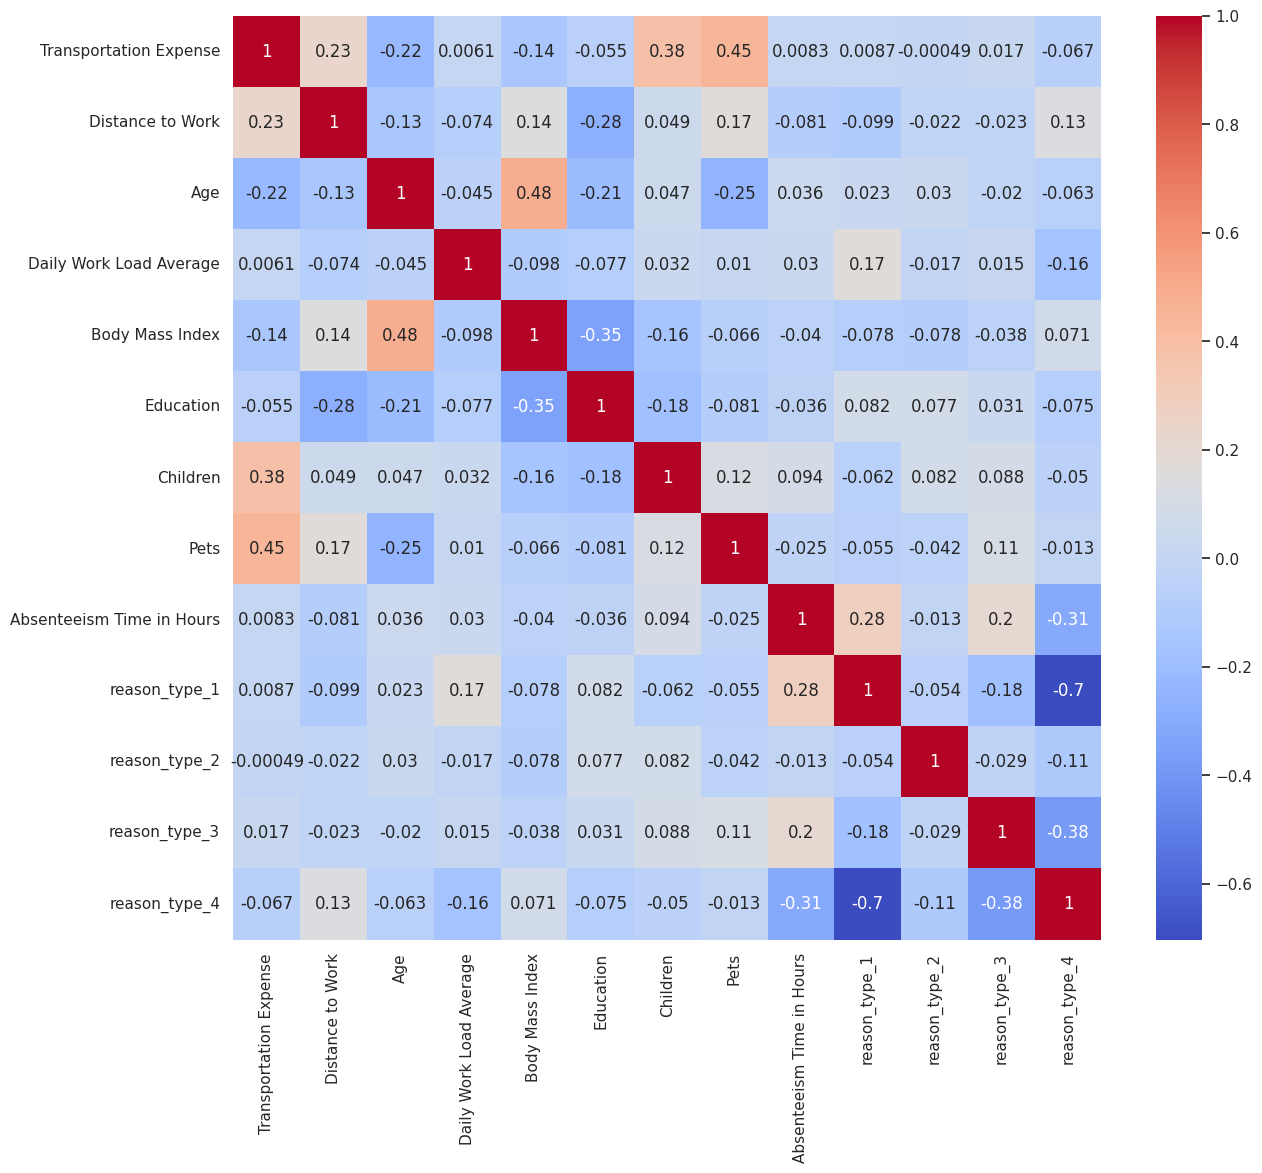

In [45]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(numeric_only = True) , annot=True, cmap='coolwarm')
plt.show()

In [46]:
df_reason_mod = df.copy()
df_reason_mod.head()

Date  Transportation Expense  Distance to Work  Age  \
0  07/07/2015                     289                36   33   
1  14/07/2015                     118                13   50   
2  15/07/2015                     179                51   38   
3  16/07/2015                     279                 5   39   
4  23/07/2015                     289                36   33   

   Daily Work Load Average  Body Mass Index  Education  Children  Pets  \
0                  239.554               30          1         2     1   
1                  239.554               31          1         1     0   
2                  239.554               31          1         0     0   
3                  239.554               24          1         2     0   
4                  239.554               30          1         2     1   

   Absenteeism Time in Hours  reason_type_1  reason_type_2  reason_type_3  \
0                          4          False          False          False   
1                          0          False          False          False   
2                          2          False          False          False   
3                          4           True          False          False   
4                          2          False          False          False   

   reason_type_4  
0           True  
1          False  
2           True  
3          False  
4           True

In [47]:
df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'], format='%d/%m/%Y')
df_reason_mod.head()

Date  Transportation Expense  Distance to Work  Age  \
0 2015-07-07                     289                36   33   
1 2015-07-14                     118                13   50   
2 2015-07-15                     179                51   38   
3 2015-07-16                     279                 5   39   
4 2015-07-23                     289                36   33   

   Daily Work Load Average  Body Mass Index  Education  Children  Pets  \
0                  239.554               30          1         2     1   
1                  239.554               31          1         1     0   
2                  239.554               31          1         0     0   
3                  239.554               24          1         2     0   
4                  239.554               30          1         2     1   

   Absenteeism Time in Hours  reason_type_1  reason_type_2  reason_type_3  \
0                          4          False          False          False   
1                          0          False          False          False   
2                          2          False          False          False   
3                          4           True          False          False   
4                          2          False          False          False   

   reason_type_4  
0           True  
1          False  
2           True  
3          False  
4           True

In [49]:
df_reason_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       700 non-null    datetime64[ns]
 1   Transportation Expense     700 non-null    int64         
 2   Distance to Work           700 non-null    int64         
 3   Age                        700 non-null    int64         
 4   Daily Work Load Average    700 non-null    float64       
 5   Body Mass Index            700 non-null    int64         
 6   Education                  700 non-null    int64         
 7   Children                   700 non-null    int64         
 8   Pets                       700 non-null    int64         
 9   Absenteeism Time in Hours  700 non-null    int64         
 10  reason_type_1              700 non-null    bool          
 11  reason_type_2              700 non-null    bool          
 12  reason_t

In [50]:
df_reason_mod['Month'] = df_reason_mod['Date'].dt.month
df_reason_mod['Day of the Week'] = df_reason_mod['Date'].dt.dayofweek
df_reason_mod.head()

Date  Transportation Expense  Distance to Work  Age  \
0 2015-07-07                     289                36   33   
1 2015-07-14                     118                13   50   
2 2015-07-15                     179                51   38   
3 2015-07-16                     279                 5   39   
4 2015-07-23                     289                36   33   

   Daily Work Load Average  Body Mass Index  Education  Children  Pets  \
0                  239.554               30          1         2     1   
1                  239.554               31          1         1     0   
2                  239.554               31          1         0     0   
3                  239.554               24          1         2     0   
4                  239.554               30          1         2     1   

   Absenteeism Time in Hours  reason_type_1  reason_type_2  reason_type_3  \
0                          4          False          False          False   
1                          0          False          False          False   
2                          2          False          False          False   
3                          4           True          False          False   
4                          2          False          False          False   

   reason_type_4  Month  Day of the Week  
0           True      7                1  
1          False      7                1  
2           True      7                2  
3          False      7                3  
4           True      7                3